In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df

,x_1,x_2,x_3,x_4,y
0,1.0,0.0,2.976142,0.651482,10
1,0.0,1.0,1.411390,0.743732,12
2,0.0,1.0,1.039892,1.290588,7
3,1.0,0.0,2.338679,0.973942,15
4,0.0,1.0,2.385257,0.297921,9
...,...,...,...,...,...
2495,0.0,1.0,2.372802,1.658083,20
2496,0.0,1.0,2.681021,1.714153,16
2497,0.0,1.0,1.491243,0.841156,7
2498,0.0,1.0,2.863177,1.137934,12


In [4]:
x = np.hstack((np.ones((df.shape[0],1)),df[["x_1"]].to_numpy(),df[["x_2"]].to_numpy(),df[["x_3"]].to_numpy(),df[["x_4"]].to_numpy()))
y = df[["y"]].to_numpy()

In [5]:
x.shape,y.shape

((2500, 5), (2500, 1))

In [6]:
def cost(x,y,theta):
    co = np.sum(abs((y - np.exp(x @ theta))),axis=0) / x.shape[0]
    return co

In [7]:
def gradient(x,y,theta):
    grad = x.T @ (y - np.exp(x @ theta)) / x.shape[0]
    return grad

In [8]:
def training(x,y,theta,eps,training_rate=1e-5):
    delta = 1
    iteration = 0
    while delta > eps:
        iteration += 1
        theta_prev = theta.copy()
        theta += training_rate * gradient(x,y,theta)
        delta = np.linalg.norm(theta-theta_prev, ord=1)
        if iteration % 10000 == 0:
            print(f"Iteration = {iteration} delta = {delta} Cost = {cost(x,y,theta)}")
    return theta

In [9]:
theta = np.zeros((x.shape[1],1))
theta_final = training(x,y,theta,1e-6)
theta_final

Iteration = 10000 delta = 3.0203904516634683e-05 Cost = [3.24910863]
Iteration = 20000 delta = 2.1664718584141207e-05 Cost = [3.03587341]
Iteration = 30000 delta = 1.661195407717808e-05 Cost = [2.88786936]
Iteration = 40000 delta = 1.2902198289532762e-05 Cost = [2.78917215]
Iteration = 50000 delta = 1.0548297923851369e-05 Cost = [2.71947212]
Iteration = 60000 delta = 9.433436286676589e-06 Cost = [2.66839245]
Iteration = 70000 delta = 8.437832304364346e-06 Cost = [2.62959472]
Iteration = 80000 delta = 7.548259514988942e-06 Cost = [2.59927226]
Iteration = 90000 delta = 6.752329501369392e-06 Cost = [2.57452417]
Iteration = 100000 delta = 6.039254505707525e-06 Cost = [2.55504794]
Iteration = 110000 delta = 5.3998358686135894e-06 Cost = [2.53960603]
Iteration = 120000 delta = 4.826215247111243e-06 Cost = [2.52734064]
Iteration = 130000 delta = 4.311602258055824e-06 Cost = [2.51776735]
Iteration = 140000 delta = 3.8500479275782595e-06 Cost = [2.51030149]
Iteration = 150000 delta = 3.43627514

array([[0.91999294],
       [0.48880885],
       [0.4311841 ],
       [0.29187364],
       [0.4184806 ]])

In [10]:
df["y_prediction"] = np.exp(x @ theta_final)

In [11]:
df["difference"] = abs(df["y_prediction"] - df["y"])

In [12]:
df

,x_1,x_2,x_3,x_4,y,y_prediction,difference
0,1.0,0.0,2.976142,0.651482,10,12.808281,2.808281
1,0.0,1.0,1.411390,0.743732,12,7.959466,4.040534
2,0.0,1.0,1.039892,1.290588,7,8.978026,1.978026
3,1.0,0.0,2.338679,0.973942,15,12.170029,2.829971
4,0.0,1.0,2.385257,0.297921,9,8.776211,0.223789
...,...,...,...,...,...,...,...
2495,0.0,1.0,2.372802,1.658083,20,15.450030,4.549970
2496,0.0,1.0,2.681021,1.714153,16,17.305709,1.305709
2497,0.0,1.0,1.491243,0.841156,7,8.486180,1.486180
2498,0.0,1.0,2.863177,1.137934,12,14.340194,2.340194


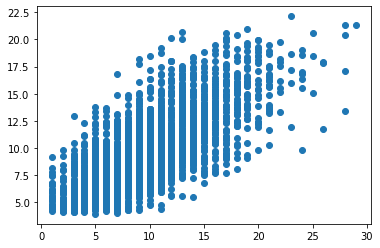

In [13]:
y_pred = np.exp(x @ theta_final)
plt.scatter(y,y_pred)

In [14]:
df_valid = pd.read_csv('valid.csv')

In [15]:
x_valid = np.hstack((np.ones((df_valid.shape[0],1)),df_valid[["x_1"]].to_numpy(),df_valid[["x_2"]].to_numpy(),df_valid[["x_3"]].to_numpy(),df_valid[["x_4"]].to_numpy()))
y_valid = df_valid[["y"]].to_numpy()

In [16]:
df_valid["y_predicted"] = np.exp(x_valid @ theta_final)

In [17]:
df_valid["difference"] = abs(df_valid["y"] - df_valid["y_predicted"])

In [18]:
df_valid

,x_1,x_2,x_3,x_4,y,y_predicted,difference
0,0.0,1.0,2.935941,0.134269,9,9.624288,0.624288
1,0.0,1.0,1.069621,0.690561,14,7.045279,6.954721
2,0.0,1.0,2.447227,0.959625,12,11.787535,0.212465
3,0.0,1.0,1.714148,0.290336,7,7.192161,0.192161
4,0.0,1.0,2.407992,1.997216,8,17.989759,9.989759
...,...,...,...,...,...,...,...
245,0.0,1.0,1.688541,1.352683,10,11.134955,1.134955
246,0.0,1.0,1.515391,0.958447,5,8.976151,3.976151
247,0.0,1.0,1.175453,0.469916,6,6.625404,0.625404
248,0.0,1.0,1.437289,1.704457,8,11.988718,3.988718


Text(0, 0.5, 'predict counts')

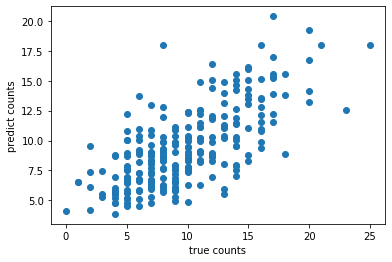

In [19]:
y_pred = np.exp(x_valid @ theta_final)
plt.scatter(y_valid, y_pred)
plt.xlabel('true counts')
plt.ylabel('predict counts')